In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report

In [22]:
try:
    df = pd.read_csv('../data/heart_disease_selected_features.csv')
    print("Dataset with selected features loaded successfully.")
except FileNotFoundError:
    print("Error: 'heart_disease_selected_features.csv' not found.")
    print("Please run the feature selection script first to generate this file.")
    
    print("Creating a dummy dataframe for demonstration purposes.")
    data = {
        'feat1': np.random.rand(303), 'feat2': np.random.rand(303), 'feat3': np.random.rand(303),
        'feat4': np.random.rand(303), 'feat5': np.random.rand(303), 'feat6': np.random.rand(303),
        'feat7': np.random.rand(303), 'feat8': np.random.rand(303),
        'target': np.random.randint(0, 2, 303)
    }
    df = pd.DataFrame(data)

Dataset with selected features loaded successfully.


In [23]:
X = df.drop('target', axis=1)
y = df['target']

In [24]:
y = (y > 0).astype(int)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (242, 8)
Testing set shape: (61, 8)


In [26]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42) # probability=True for ROC curve
}

In [27]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
print("--- All models trained successfully ---")

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Support Vector Machine...
--- All models trained successfully ---


In [28]:
results = {}

In [29]:
for name, model in models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Store metrics
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc,
        "FPR": fpr,
        "TPR": tpr
    }

    # Print classification report
    print(f"\n--- Classification Report for {name} ---")
    print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))


--- Classification Report for Logistic Regression ---
              precision    recall  f1-score   support

  No Disease       0.96      0.82      0.89        33
     Disease       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61


--- Classification Report for Decision Tree ---
              precision    recall  f1-score   support

  No Disease       0.81      0.67      0.73        33
     Disease       0.68      0.82      0.74        28

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61


--- Classification Report for Random Forest ---
              precision    recall  f1-score   support

  No Disease       0.96      0.76      0.85        33
     Disease       0.77      0.96      0.86        28

    accuracy                 

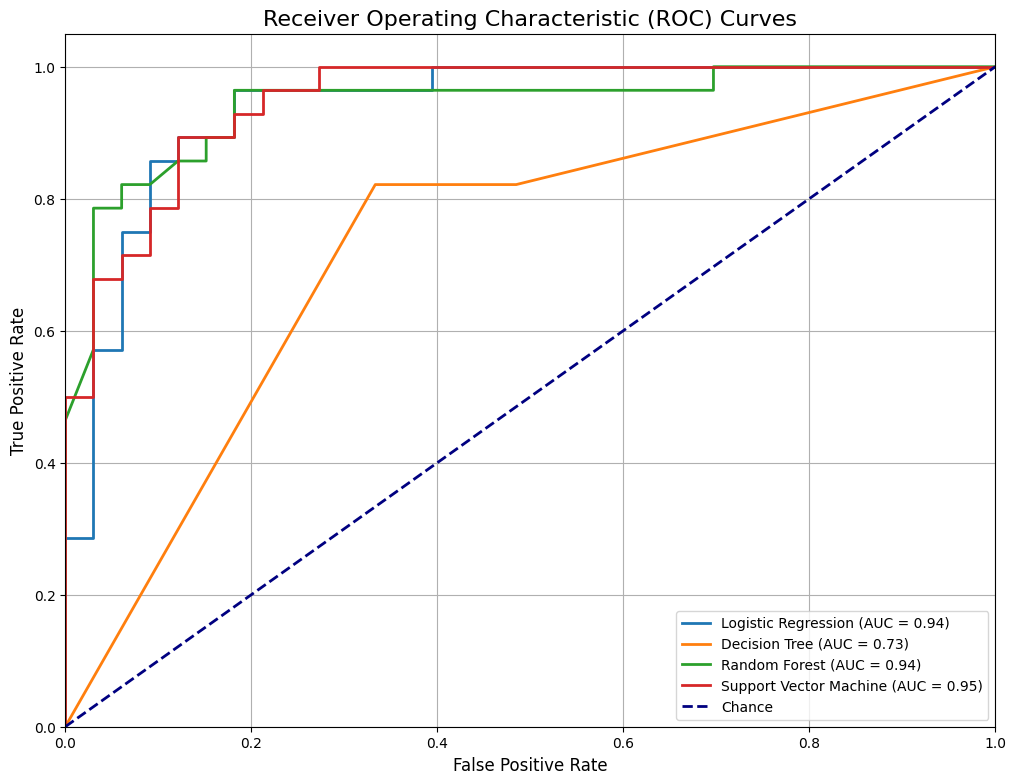

In [30]:
plt.figure(figsize=(12, 9))
for name, metrics in results.items():
    plt.plot(metrics["FPR"], metrics["TPR"], lw=2,
             label=f'{name} (AUC = {metrics["ROC AUC"]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [31]:
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [res['Accuracy'] for res in results.values()],
    'Precision': [res['Precision'] for res in results.values()],
    'Recall': [res['Recall'] for res in results.values()],
    'F1-Score': [res['F1-Score'] for res in results.values()],
    'ROC AUC': [res['ROC AUC'] for res in results.values()]
})
print("\n--- Summary of Model Performance Metrics ---")
print(results_df.sort_values(by='ROC AUC', ascending=False))


--- Summary of Model Performance Metrics ---
                    Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
3  Support Vector Machine  0.852459   0.851852  0.821429  0.836364  0.949134
2           Random Forest  0.852459   0.771429  0.964286  0.857143  0.942641
0     Logistic Regression  0.885246   0.818182  0.964286  0.885246  0.939394
1           Decision Tree  0.737705   0.676471  0.821429  0.741935  0.730519
